# BigQuery Setup 

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')


Authenticated


In [2]:
%load_ext google.colab.data_table

In [ ]:
project_id = 'utility-gravity-308207'

In [3]:
!gcloud config list

[component_manager]
disable_update_check = True
[compute]
gce_metadata_read_timeout_sec = 0
[core]
account = avayakarmacharya@gmail.com

Your active configuration is: [default]


In [4]:
!gcloud config list project


[core]
project (unset)

Your active configuration is: [default]


In [5]:
!gcloud config set project 'utility-gravity-308207'
!gcloud config set account 'avayakarmacharya@gmail.com'


Updated property [core/project].
Updated property [core/account].


In [6]:
from google.cloud import bigquery

project_id = 'utility-gravity-308207'
client = bigquery.Client(project=project_id)

for dataset in client.list_datasets():
  print(dataset.dataset_id)

CMPE181


In [13]:

sql = """
SELECT
    *
FROM
`utility-gravity-308207.CMPE181.Heart_diseases` 
"""   
dfquery = client.query(sql)




# Import Dataset and display


In [14]:
df_heart=dfquery.to_dataframe()
df_heart.head(300)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


# Splitting into training and test sets 

In [17]:

from sklearn.model_selection import train_test_split, cross_val_score
X = df_heart.iloc[:, [4,7,11]]
y = df_heart.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Features Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Logistic Regression

## Prediciting from test set

In [26]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(X_train, y_train)
y_predict_regression = logistic_classifier.predict(X_test)

## Confusion Matrix

<Figure size 432x288 with 0 Axes>

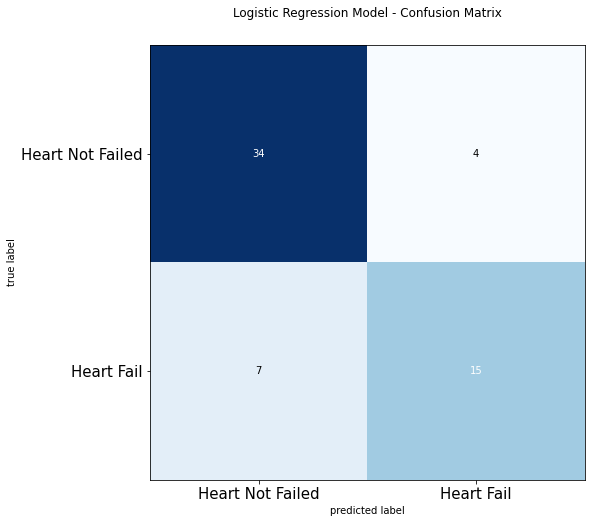

In [37]:

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict_regression)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=15)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=15)
plt.show()

## Accuracy Score


In [53]:
import numpy as np

a_score = accuracy_score(y_test, y_predict_regression)
print("Accuracy of Support Vector Machine is : ", 100* a_score)


Accuracy of Support Vector Machine is :  81.66666666666667


# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decisiontree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting from test set

In [46]:
decision_tree_y = decisiontree_classifier.predict(X_test)

## Confusion Matrix

<Figure size 432x288 with 0 Axes>

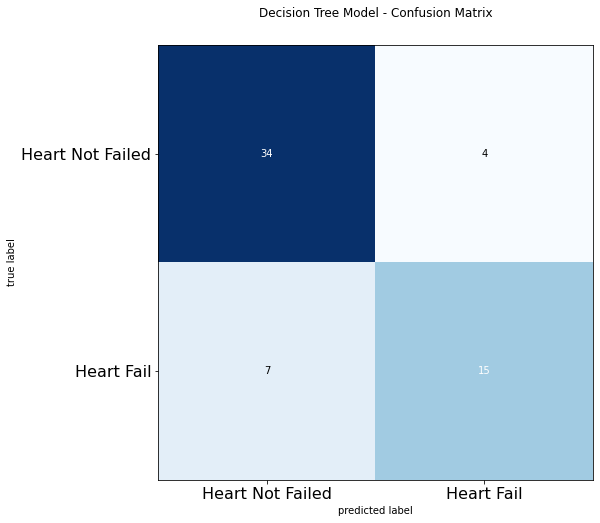

In [48]:
cm_decision = confusion_matrix(y_test, decision_tree_y)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

## Accuracy Score

In [52]:
decision_tree_ac = accuracy_score(y_test, decision_tree_y)
print( "Accuracy of Decision Tree is : ", 100* decision_tree_ac)


Accuracy of Decision Tree is :  80.0


# Data Analysis 

## Dataset info

In [54]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Correlation Matrix

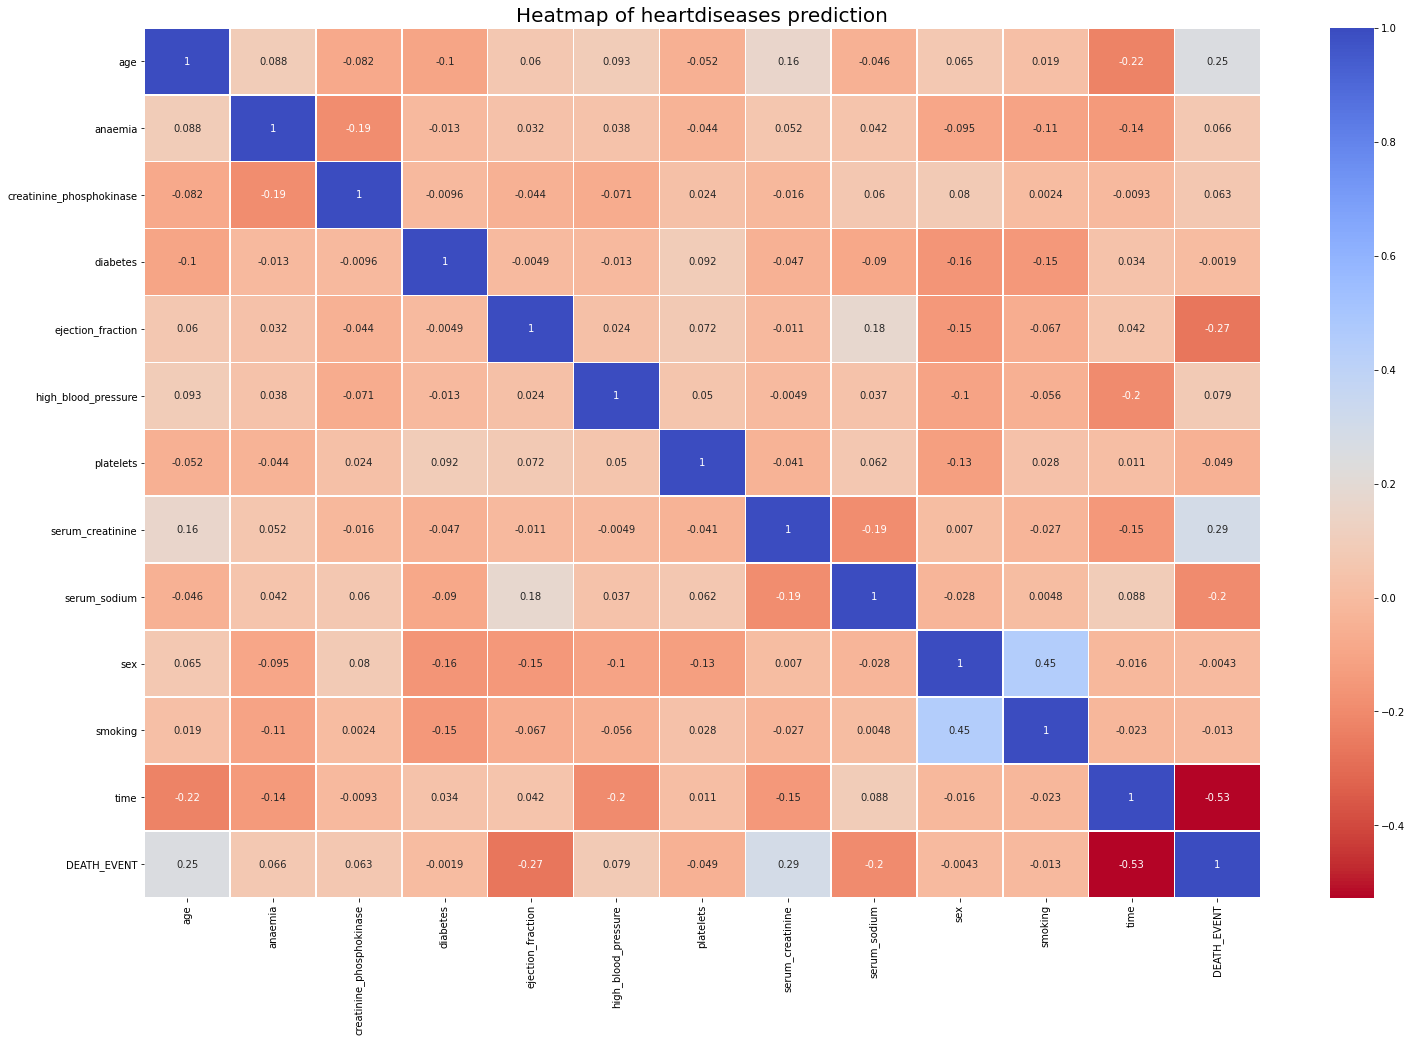

In [60]:
import seaborn as sns

correlation_matrix = df_heart.corr()
plt.figure(figsize=(25, 16))
heat = sns.heatmap(correlation_matrix, annot = True, linewidths=.5, cmap='coolwarm_r')
heat.set_title(label='Heatmap of heartdiseases prediction', fontsize=20)
plt.show()

## Pair Grid plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


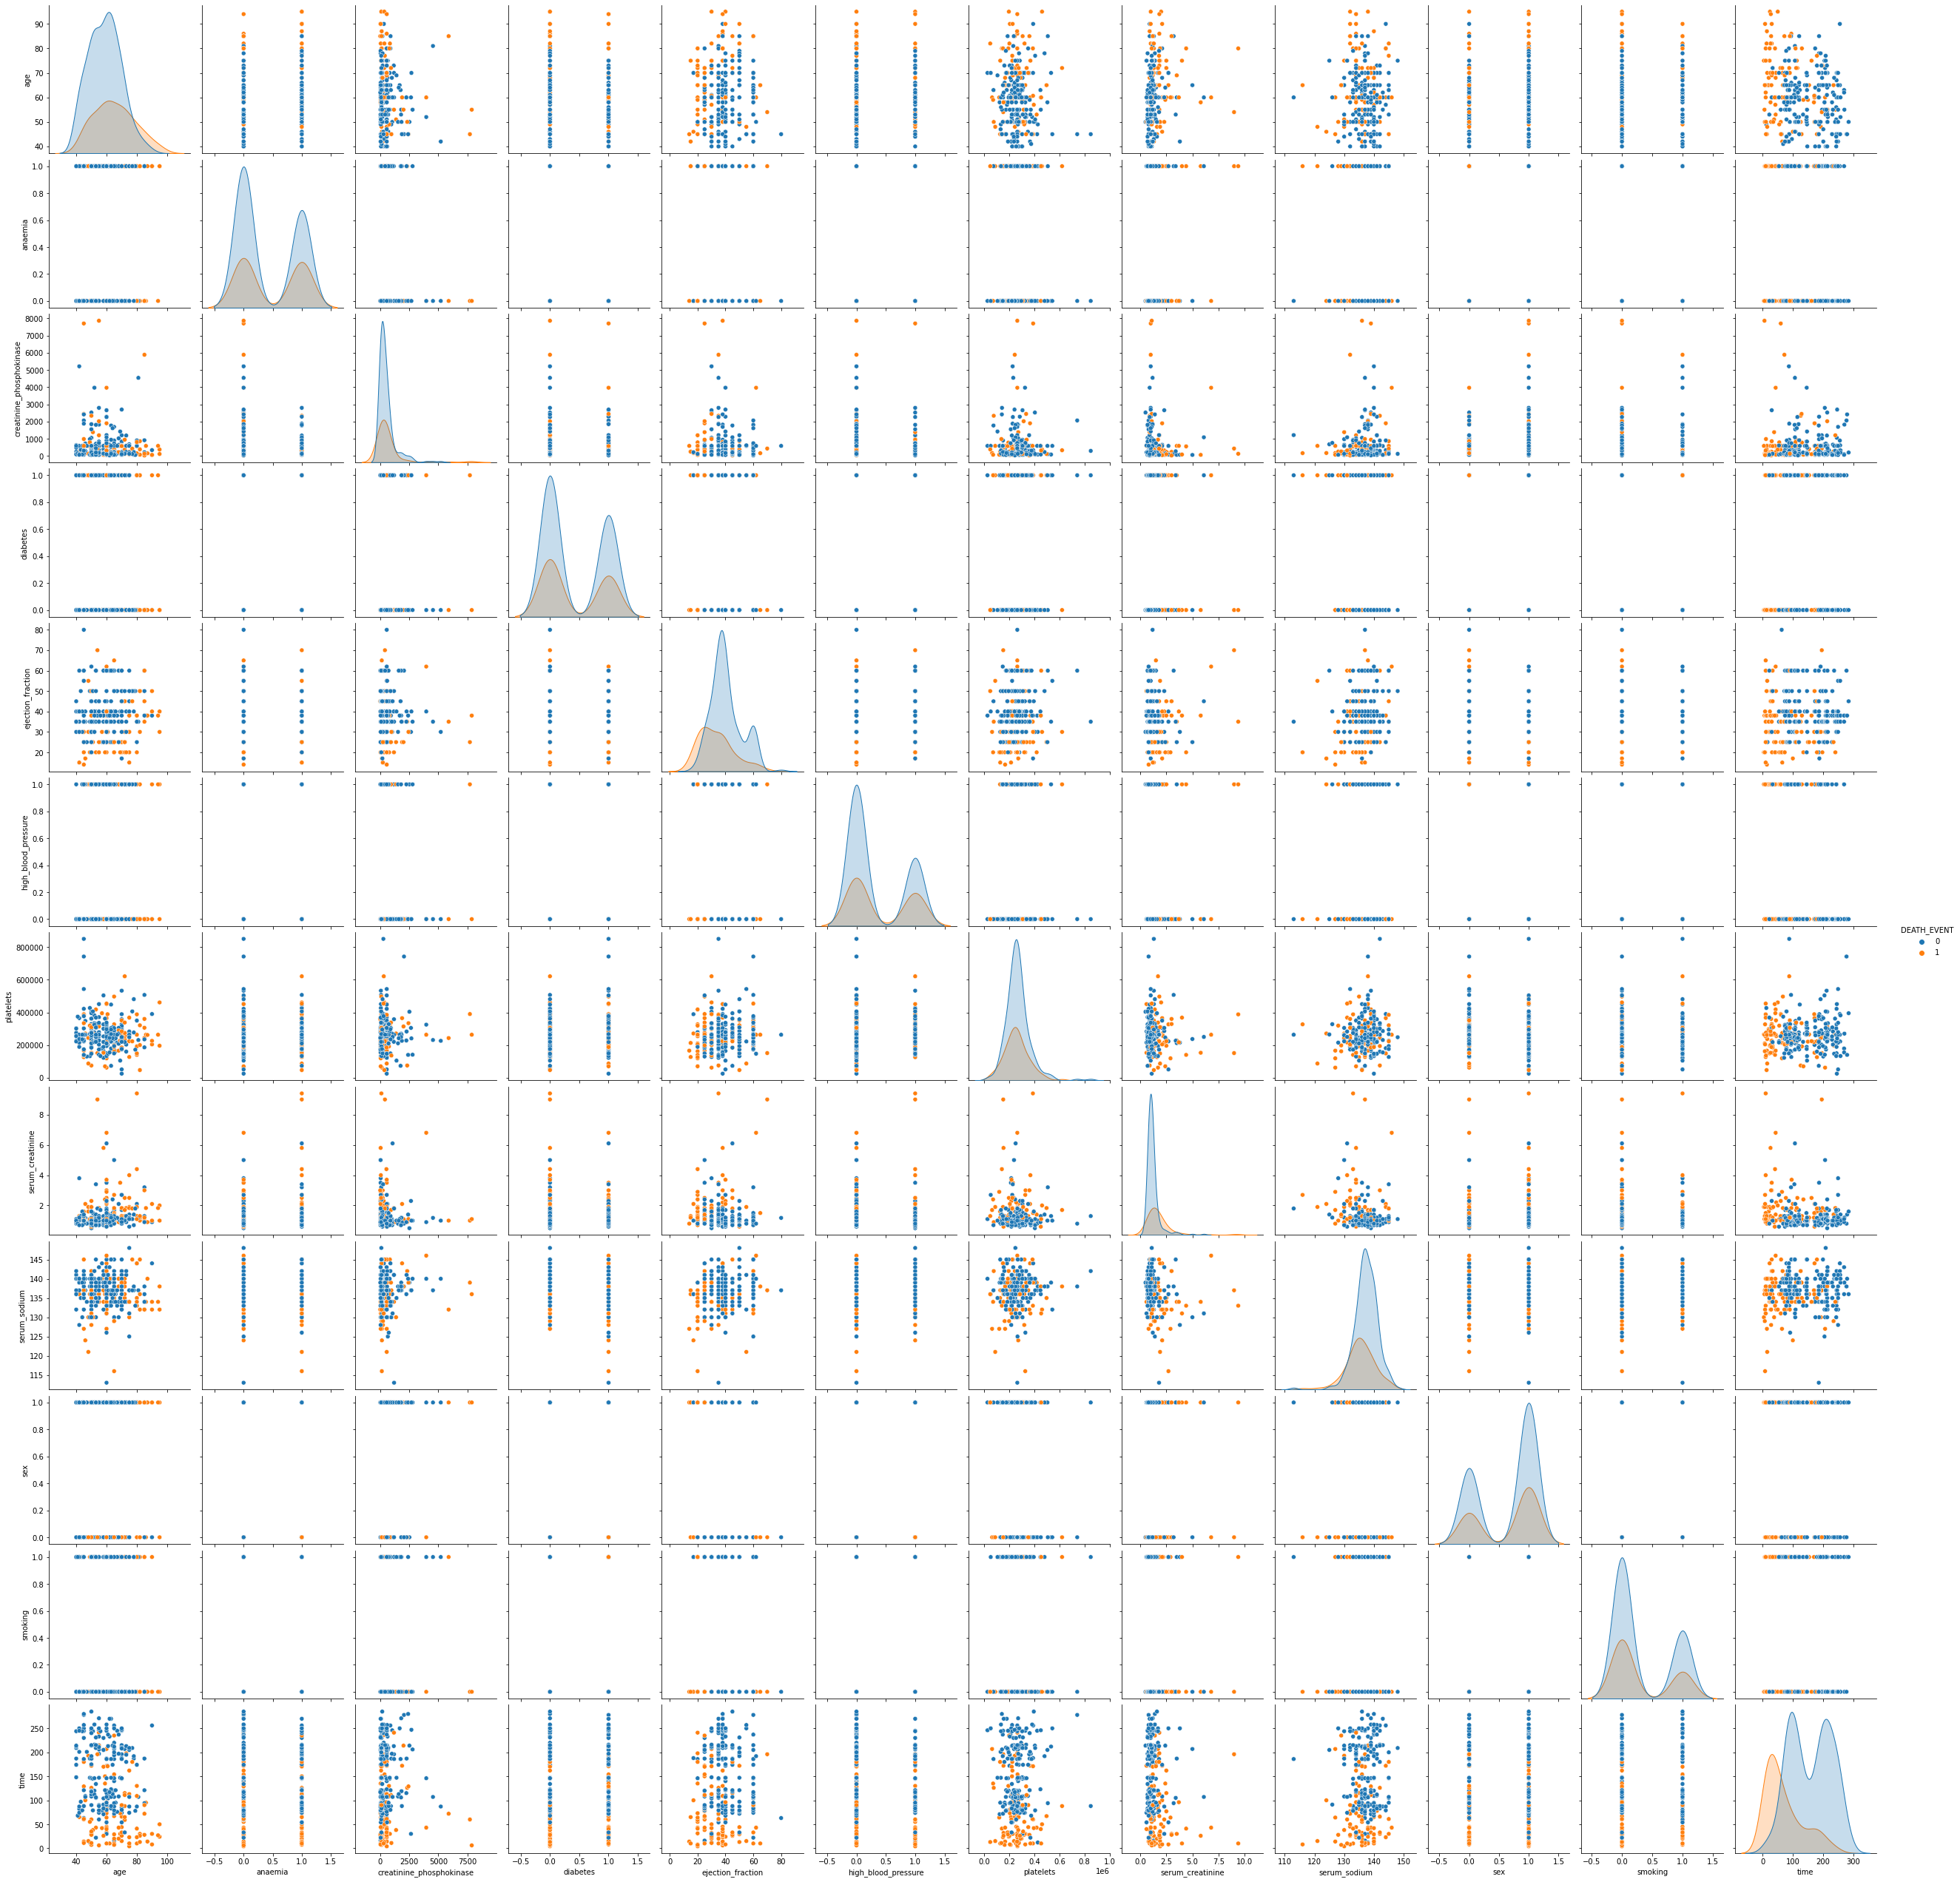

In [62]:
sns.pairplot(df_heart, hue="DEATH_EVENT", size=3, diag_kind="kde")
